# How to handle outlaires

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\HP\\regex2\\Machine_Learning\\Assignment_2\\newplacementdata.csv")

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [5]:
import matplotlib.pyplot as plt

import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


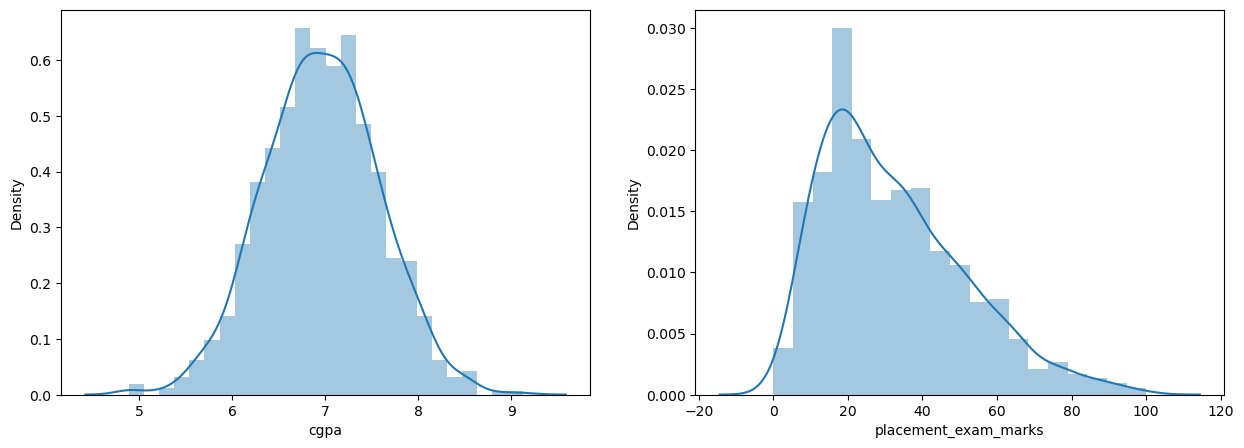

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['cgpa'])
plt.subplot(122)
sns.distplot(df['placement_exam_marks'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

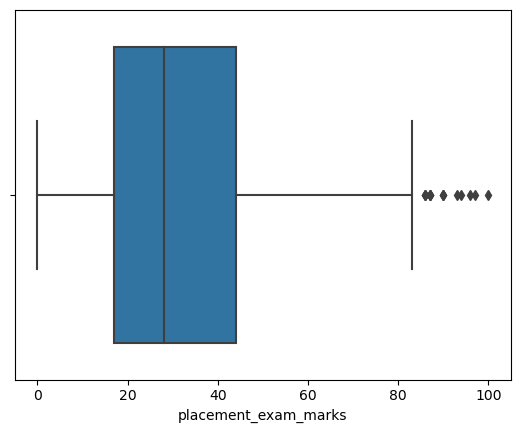

In [7]:
sns.boxplot(df['placement_exam_marks'])

In [8]:
#finding the IRQ

percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)


In [9]:
percentile25

17.0

In [10]:
percentile75

44.0

In [11]:
IQR=percentile75-percentile25
IQR

27.0

In [12]:
upper_limit=percentile75+1.5*IQR
upper_limit

84.5

In [13]:
lower_limit=percentile25-1.5*IQR
lower_limit

-23.5

# finding our outliers

In [14]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [15]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


In [16]:
newdf=df[df['placement_exam_marks']<upper_limit]

In [17]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

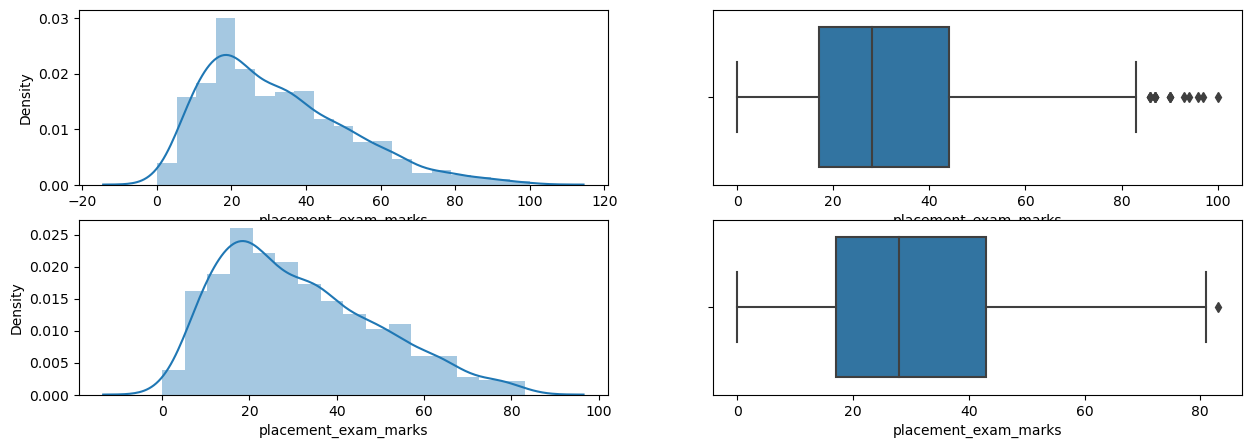

In [18]:
plt.figure(figsize = (15,5))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])
plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(223)
sns.distplot(newdf['placement_exam_marks'])
plt.subplot(224)
sns.boxplot(newdf ['placement_exam_marks'])
plt.show()

In [ ]:
#capping(outlier removing technique 2) 

In [19]:
new_df_cap=df.copy()

In [ ]:
# min = 5 max 15
#min 4, 3, 1
#max = 20, 30 50
# updated_min_value = 1
# updated_max_value = 50

In [20]:
new_df_cap['placement_exam_marks']=np.where(
    
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,

    np.where(
    new_df_cap['placement_exam_marks']<lower_limit,
    lower_limit,
    new_df_cap['placement_exam_marks'])

)

In [21]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

<AxesSubplot:xlabel='placement_exam_marks'>

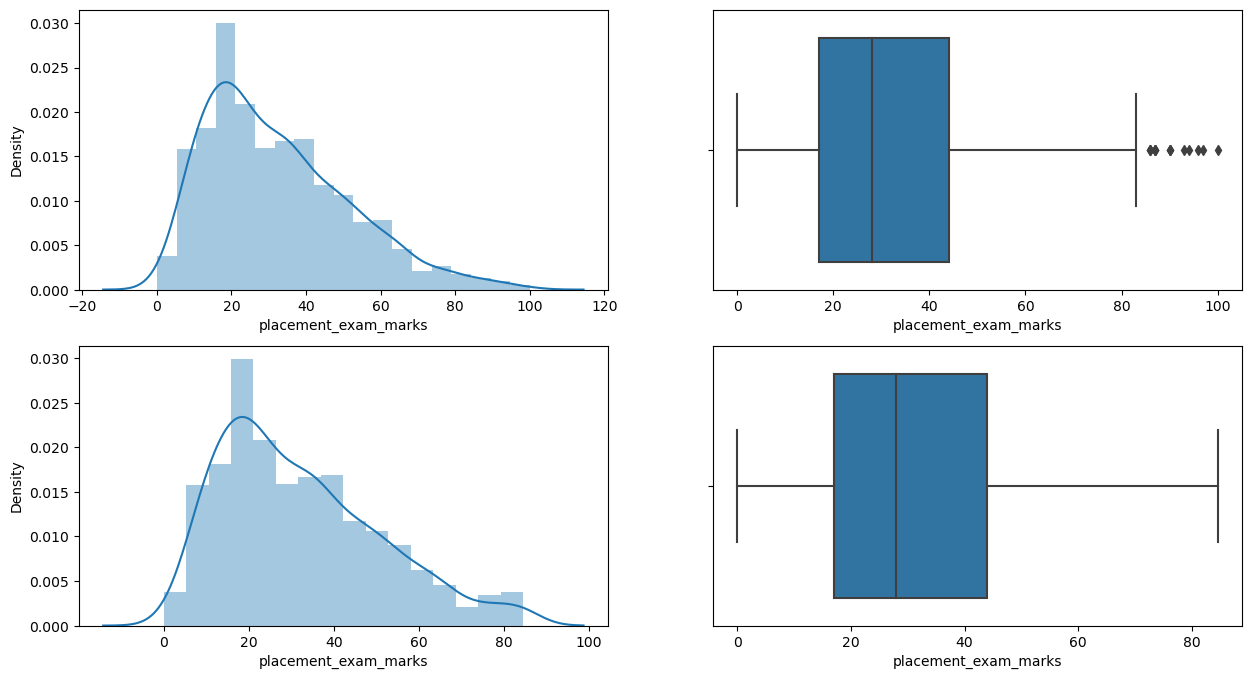

In [23]:
plt.figure(figsize = (15,8))
plt.subplot(221)
sns.distplot(df ['placement_exam_marks'])

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(new_df_cap['placement_exam_marks'])

# Apply endoding standardization and normalisation Attrition data 

In [24]:
import numpy as np
import pandas as pd  

In [25]:
df=pd.read_csv("C:\\Users\\HP\\regex2\\Machine_Learning\\Assignment_2\\Attrition.csv")

In [26]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [27]:
df=df.dropna()

# LabelEndcoding

In [28]:
from sklearn.preprocessing import  LabelEncoder

In [29]:
lb=LabelEncoder()

In [38]:
df['Attrition']=lb.fit_transform(df['Attrition'])
df['BusinessTravel']=lb.fit_transform(df['BusinessTravel'])
df['Department']=lb.fit_transform(df['Department'])
df['EducationField']=lb.fit_transform(df['EducationField'])
df['Gender']=lb.fit_transform(df['Gender'])
df['JobRole']=lb.fit_transform(df['JobRole'])
df['MaritalStatus']=lb.fit_transform(df['MaritalStatus'])
df['Over18']=lb.fit_transform(df['Over18'])
df['OverTime']=lb.fit_transform(df['OverTime'])

# standardization

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(df)
#df_sc
df_new = pd.DataFrame(df_sc, columns = df.columns)
np.round(df.describe(),1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,...,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,36.9,0.2,1.6,802.5,1.3,9.2,2.9,2.2,1.0,1024.9,...,2.7,80.0,0.8,11.3,2.8,2.8,7.0,4.2,2.2,4.1
std,9.1,0.4,0.7,403.5,0.5,8.1,1.0,1.3,0.0,602.0,...,1.1,0.0,0.9,7.8,1.3,0.7,6.1,3.6,3.2,3.6
min,18.0,0.0,0.0,102.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,0.0,1.0,465.0,1.0,2.0,2.0,1.0,1.0,491.2,...,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,0.0,2.0,802.0,1.0,7.0,3.0,2.0,1.0,1020.5,...,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,0.0,2.0,1157.0,2.0,14.0,4.0,3.0,1.0,1555.8,...,4.0,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1.0,2.0,1499.0,2.0,29.0,5.0,5.0,1.0,2068.0,...,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0


# normalisation

In [40]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
df_mn = mn.fit_transform(df)
df_new = pd. DataFrame(df_mn, columns = df.columns)
np.round(df.describe(), 1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,...,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,36.9,0.2,1.6,802.5,1.3,9.2,2.9,2.2,1.0,1024.9,...,2.7,80.0,0.8,11.3,2.8,2.8,7.0,4.2,2.2,4.1
std,9.1,0.4,0.7,403.5,0.5,8.1,1.0,1.3,0.0,602.0,...,1.1,0.0,0.9,7.8,1.3,0.7,6.1,3.6,3.2,3.6
min,18.0,0.0,0.0,102.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,0.0,1.0,465.0,1.0,2.0,2.0,1.0,1.0,491.2,...,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,0.0,2.0,802.0,1.0,7.0,3.0,2.0,1.0,1020.5,...,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,0.0,2.0,1157.0,2.0,14.0,4.0,3.0,1.0,1555.8,...,4.0,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1.0,2.0,1499.0,2.0,29.0,5.0,5.0,1.0,2068.0,...,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0


In [41]:
np.round(df_new.describe(), 1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,...,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,0.5,0.2,0.8,0.5,0.6,0.3,0.5,0.4,0.0,0.5,...,0.6,0.0,0.3,0.3,0.5,0.6,0.2,0.2,0.1,0.2
std,0.2,0.4,0.3,0.3,0.3,0.3,0.3,0.3,0.0,0.3,...,0.4,0.0,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.3,0.0,0.5,0.3,0.5,0.0,0.2,0.2,0.0,0.2,...,0.3,0.0,0.0,0.2,0.3,0.3,0.1,0.1,0.0,0.1
50%,0.4,0.0,1.0,0.5,0.5,0.2,0.5,0.4,0.0,0.5,...,0.7,0.0,0.3,0.2,0.5,0.7,0.1,0.2,0.1,0.2
75%,0.6,0.0,1.0,0.8,1.0,0.5,0.8,0.6,0.0,0.8,...,1.0,0.0,0.3,0.4,0.5,0.7,0.2,0.4,0.2,0.4
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
